# Applying the unsupervised method for feature extraction (using Mel-Spectogram)

### we gonna apply PCA on `birdclef` dtata
To read and interpret the PCA feature graph for your bird species classification task, you should first understand the purpose of PCA. Principal Component Analysis (PCA) is a technique that reduces the dimensionality of your data while preserving as much of the original variance as possible. This can help to visualize high-dimensional data in lower-dimensional spaces, like 2D or 3D, and identify patterns or trends within the data.

When you create a scatter plot using PCA features, you'll see data points plotted on a 2D plane, where the x-axis represents the first principal component (PC1) and the y-axis represents the second principal component (PC2). Each data point represents a single bird sound sample, and its position on the graph is determined by the values of its principal components. The different colors represent different bird species.

To interpret the PCA feature graph for your bird species classification task, follow these steps:

1. **Identify clusters:** Look for clusters or groupings of data points in the graph. If the PCA features are useful for your classification task, **you should see some degree of separation between data points belonging to different bird species. The clearer the separation, the more likely a classifier will be able to distinguish between the different species.**

2. **Observe overlapping regions:** If you see that data points of different species are overlapping or mixing, it indicates that the PCA features might not be sufficient for accurate classification. In this case, you may need to consider other dimensionality reduction techniques or use the original features.

3. Analyze the principal components: The axes of the PCA feature graph represent the directions of maximum variance in the data. The first principal component (PC1) captures the most significant variance, while the second principal component (PC2) captures the second most significant variance. If you find that most of the separation between species occurs along the first principal component, it may be an indication that this component is particularly important for discriminating between bird species. However, it's essential to consider both principal components when evaluating the separability of the data.

Keep in mind that PCA is a linear dimensionality reduction technique, which means it might not capture complex relationships between features. If the PCA feature graph doesn't show clear separability between bird species, you may want to explore other dimensionality reduction techniques like t-SNE or UMAP to visualize your data better.

Convolutional Neural Network (CNN) based encoder feature extraction method on mel spectrogram .pny files and then apply Principal Component Analysis (PCA) on the extracted features. Here's a step-by-step guide to help you accomplish this using Python, assuming you have the necessary dependencies installed (e.g., NumPy, TensorFlow, and scikit-learn):

1. Load the mel spectrogram .pny files:

In [ ]:
import os
import glob
import numpy as np
import pickle
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
def load_data(data_dir):
    data = []
    labels = []
    sub_dirs = os.listdir(data_dir)
    for sub_dir in sub_dirs:
        npy_files = glob.glob(os.path.join(data_dir, sub_dir, '*.npy'))
        for npy_file in npy_files:
            mel_spec = np.load(npy_file)
            data.append(mel_spec)
            labels.append(sub_dir)
    return np.array(data), np.array(labels)


2. Define the CNN encoder model:

In [ ]:
def create_cnn_encoder(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model


3. Preprocess the data and apply the CNN encoder:

In [ ]:
data_dir = '/content/drive/MyDrive/OUTPUT_mel_npy'
data, labels = load_data(data_dir)
data = data.reshape(data.shape + (1,))  # Add an extra dimension for the channel

input_shape = data.shape[1:]
cnn_encoder = create_cnn_encoder(input_shape)
features = cnn_encoder.predict(data)


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


110/110 [==============================] - 107s 942ms/step


4. Apply PCA on the extracted features:

In [ ]:
n_components = 2  # Set the desired number of principal components
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(features)


In [ ]:
pca_features

array([[-1.1258239e+01,  7.3883170e-01],
       [-1.0878221e+01, -6.7154779e-03],
       [-6.6914644e+00, -6.4290082e-01],
       ...,
       [-1.3210509e+01,  2.9335272e-01],
       [-5.6348443e-01, -2.0643568e-01],
       [-1.3311503e+01,  3.8723311e-01]], dtype=float32)

By visualizing the PCA features, you can get a better understanding of the separability and structure of the data.

Here's how you can create a scatter plot using Matplotlib:

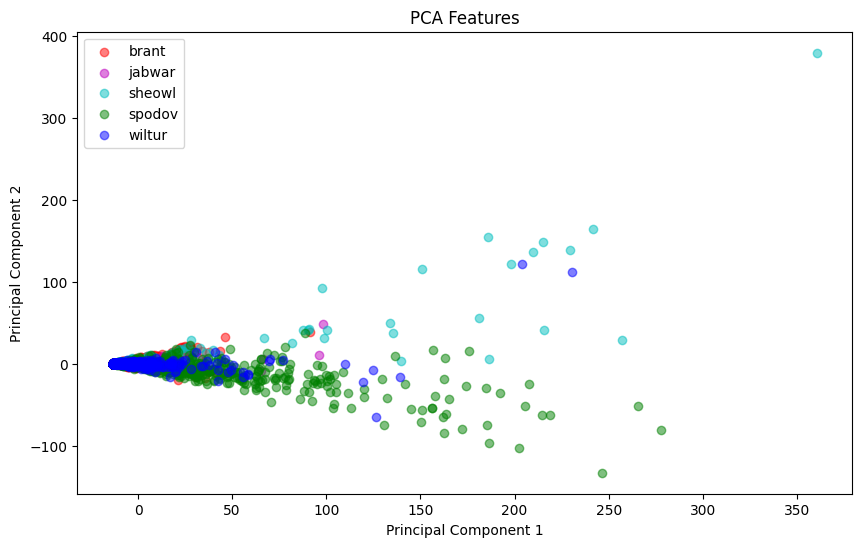

In [ ]:
import matplotlib.pyplot as plt
def visualize_pca_features(pca_features, labels, n_components):
    plt.figure(figsize=(10, 6))
    
    # If you have more than two classes, you can define a color map for better visualization
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    label_set = list(set(labels))
    label_dict = {label: idx for idx, label in enumerate(label_set)}

    for i, label in enumerate(labels):
        color = colors[label_dict[label] % len(colors)]
        if n_components == 2:
            plt.scatter(pca_features[i, 0], pca_features[i, 1], color=color, label=label, alpha=0.5)
        elif n_components == 3:
            ax = plt.subplot(111, projection='3d')
            ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=color, label=label, alpha=0.5)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    if n_components == 3:
        ax.set_zlabel('Principal Component 3')

    plt.title('PCA Features')
    plt.show()

visualize_pca_features(pca_features, labels, n_components)


This will create a scatter plot of the PCA features, with different colors for different classes (assuming the labels are strings). You can analyze the plot to see if the features from different classes are well-separated or if they overlap. If the PCA features from different classes are well-separated, it's a good indication that a classifier should be able to distinguish between them.


**As we can see, datapoints of differnet species are overlapping or mixing, it indicates that the PCA features might not be sufficient for accurate classification. In this case, you may need to consider other dimensionality reduction techniques or use the original features.**



Once you have the PCA features, you can use them as input to train a new, possibly smaller and faster model that can still perform well on your classification task. To do this, you will need to split the PCA features into training and testing sets, and then use them to train and evaluate a new model.

Here's how you can create a new model and train it using the PCA features:

1. Split the PCA features into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=42)


2. Encode the labels using one-hot encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)


3. Create a new model using a smaller architecture:

In [ ]:
def create_new_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


4. Compile and train the new model:

In [ ]:
num_classes = len(np.unique(labels))
input_shape = (n_components,)

new_model = create_new_model(input_shape, num_classes)

new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = new_model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


71/71 [==============================] - 4s 48ms/step - loss: 1.6220 - accuracy: 0.2955 - val_loss: 1.5132 - val_accuracy: 0.3541
Epoch 2/50
71/71 [==============================] - 3s 49ms/step - loss: 1.5325 - accuracy: 0.3129 - val_loss: 1.5598 - val_accuracy: 0.3648
Epoch 3/50
71/71 [==============================] - 4s 50ms/step - loss: 1.5130 - accuracy: 0.3476 - val_loss: 1.4660 - val_accuracy: 0.3648
Epoch 4/50
71/71 [==============================] - 4s 50ms/step - loss: 1.5089 - accuracy: 0.3476 - val_loss: 1.5219 - val_accuracy: 0.3683
Epoch 5/50
71/71 [==============================] - 8s 107ms/step - loss: 1.4940 - accuracy: 0.3525 - val_loss: 1.4763 - val_accuracy: 0.3630
Epoch 6/50
71/71 [==============================] - 6s 82ms/step - loss: 1.4929 - accuracy: 0.3614 - val_loss: 1.5328 - val_accuracy: 0.3648
Epoch 7/50
71/71 [==============================] - 3s 36ms/step - loss: 1.5035 - accuracy: 0.3329 - val_loss: 1.4656 - val_accuracy: 0.3416
Epoch 8/50
71/71 [=====

5. Evaluate the new model on the test set:

In [ ]:
_, test_accuracy = new_model.evaluate(X_test, y_test_one_hot)
print(f'Test accuracy: {test_accuracy:.4f}')


22/22 [==============================] - 0s 13ms/step - loss: 1.4055 - accuracy: 0.3784
Test accuracy: 0.3784


By using the PCA features as input, you can train a smaller model that might be faster to train and evaluate. However, keep in mind that PCA is a linear dimensionality reduction technique, and it might not always capture the most relevant features for a specific classification task. It is essential to experiment with different dimensionality reduction techniques or even use the original features to ensure the best performance of your model.

###  **We find that the PCA features do not lead to a satisfactory performance, you may want to consider other dimensionality reduction techniques like t-SNE or UMAP, or use the original features extracted by the CNN encoder.**

t-SNE (t-Distributed Stochastic Neighbor Embedding) on the extracted features from the CNN encoder. t-SNE is a nonlinear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data.

Next, apply t-SNE on the extracted features:

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)


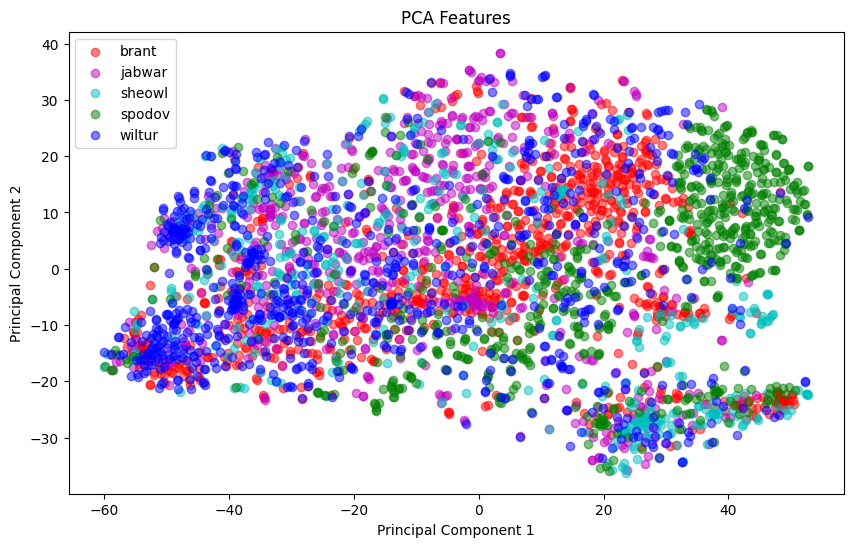

In [ ]:
visualize_pca_features(tsne_features, labels, n_components=2)


**t-SNE features are usefuill for our classification task, as we have some degree of seperation between data points belonging to difffernt birds species.  The clearer the separation, the more likely a classifier will be able to distinguish between the different species.**

From this graph, we can see that, audio data of spodov is quite different, 

This will create a scatter plot of the t-SNE features, showing the separability and structure of the data. Note that t-SNE can be computationally expensive, especially for large datasets. If you experience long execution times, you may want to consider using a subset of the data or adjusting the t-SNE parameters.

Remember that t-SNE is mainly a visualization tool and not designed for creating input features for classifiers. If you want to use dimensionality reduction techniques for classification purposes, it's best to stick with PCA, UMAP, or other methods that aim to preserve the structure of the data in lower-dimensional spaces.